In [ ]:
# 비지도 학습 : 데이터셋 내부에 정답 없음
관측값을 몇개의 집단으로 나눔. 정답이 없는 상태에서 데이터의 유사성으로 판단 => 군집
군집 : kmeans : 데이터간의 유사성을 측정하는 기준으로 클러스터의 중심까지의 거리 이용.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# 고객의 연간 구매금액을 상품카테고리별로 구분한 데이ㅓ
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header = 0)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
x = df.iloc[:,:]
# 정규화
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
x[:5]

array([[ 1.44865163,  0.59066829,  0.05293319,  0.52356777, -0.04111489,
        -0.58936716, -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197,  0.54445767,  0.17031835,
        -0.27013618,  0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926,  0.40853771, -0.0281571 ,
        -0.13753572,  0.13323164,  2.24329255],
       [-0.69029709,  0.59066829,  0.10011141, -0.62401993, -0.3929769 ,
         0.6871443 , -0.49858822,  0.09341105],
       [ 1.44865163,  0.59066829,  0.84023948, -0.05239645, -0.07935618,
         0.17385884, -0.23191782,  1.29934689]])

In [7]:
from sklearn import cluster
kms = cluster.KMeans(init = 'k-means++', n_clusters=5, n_init=10)
# init = kmeans++ 중심점 설정없이 최초설정
# n clusters 5종류의 클러스터로 설정
# n_init 10개로 시작
kms.fit(x)
cluster_label= kms.labels_
print(cluster_label)

[3 3 3 1 3 3 3 3 1 3 3 3 3 3 3 1 3 1 3 1 3 1 1 2 3 3 1 1 3 1 1 1 1 1 1 3 1
 3 3 1 1 1 3 3 3 3 3 4 3 3 1 1 3 3 1 1 4 3 1 1 3 4 3 3 1 4 1 3 1 1 1 2 1 3
 3 1 1 3 1 1 1 3 3 1 3 4 4 2 1 1 1 1 4 1 3 1 3 1 1 1 3 3 3 1 1 1 3 3 3 3 1
 3 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1
 1 1 1 1 1 1 1 3 3 1 3 3 3 1 1 3 3 3 3 1 1 1 3 3 1 3 1 3 1 1 1 1 1 2 1 2 1
 1 1 1 3 3 1 1 1 3 1 1 0 3 0 0 3 3 0 0 0 3 0 0 0 3 0 4 0 0 3 0 3 0 3 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 4 0 0 0 0 0 0 0
 0 0 0 0 0 3 0 3 0 3 0 0 0 0 1 1 1 1 1 1 3 1 3 1 1 1 1 1 1 1 1 1 1 1 3 0 3
 0 3 3 0 3 3 3 3 3 3 3 0 0 3 0 0 3 0 0 3 0 0 0 3 0 0 0 0 0 2 0 0 0 0 0 3 0
 4 0 3 0 0 0 0 3 3 1 3 1 1 3 3 1 3 1 3 1 3 1 1 1 3 1 1 1 1 1 1 1 3 1 1 1 1
 3 1 1 3 1 1 3 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1
 3 3 1 1 1 1 1 1 3 3 1 3 1 1 3 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1]


In [8]:
df['Cluster'] = cluster_label
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,3
1,2,3,7057,9810,9568,1762,3293,1776,3
2,2,3,6353,8808,7684,2405,3516,7844,3
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,3


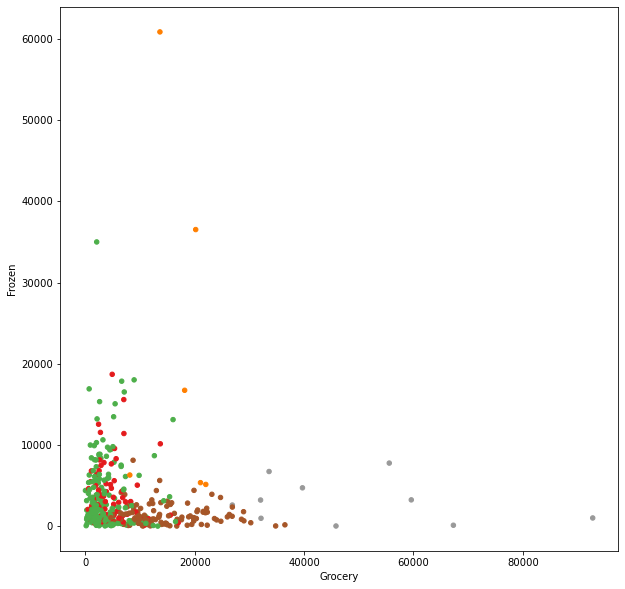

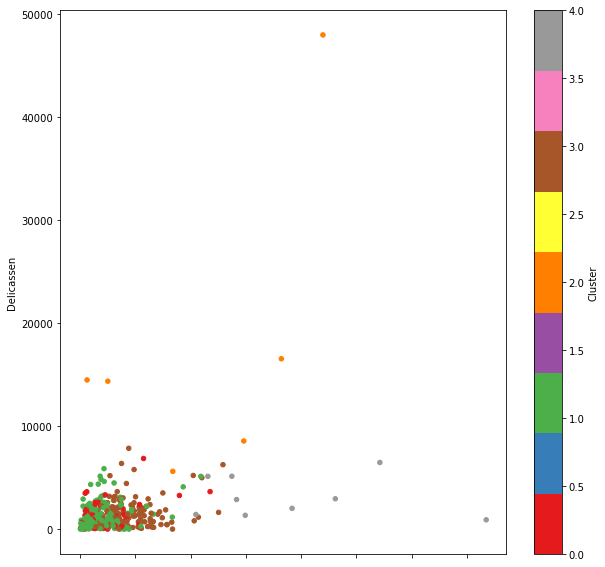

In [11]:
df.plot(kind = 'scatter', x ='Grocery', y = 'Frozen', c = 'Cluster', cmap = 'Set1', colorbar=False, figsize=(10,10))
df.plot(kind = 'scatter', x ='Milk', y = 'Delicassen', c = 'Cluster', cmap = 'Set1', colorbar=True, figsize=(10,10))
plt.show()

In [1]:
# dbscan density based clustering => 데이터 위치로부터 공간밀집도중심 클러스터 구분
noise 처리

In [15]:
import pandas as pd
import numpy as np
import folium
file_path = '2016_middle_shcool_graduates_report.xlsx'
df = pd.read_excel(file_path, engine='openpyxl', header = 0,)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_colwidth', 20)

In [16]:
df.columns.values

array(['지역', '학교명', '코드', '유형', '주야', '남학생수', '여학생수', '일반고', '특성화고',
       '과학고', '외고_국제고', '예고_체고', '마이스터고', '자사고', '자공고', '기타진학', '취업',
       '미상', '위도', '경도'], dtype=object)

In [17]:
df.head()

,지역,학교명,코드,유형,주야,...,기타진학,취업,미상,위도,경도
0,성북구,서울대학교사범대학부설중학교,3,국립,주간,...,0.004,0,0.000,37.594942,127.038909
1,종로구,서울대학교사범대학부설여자중학교,3,국립,주간,...,0.031,0,0.000,37.577473,127.003857
2,강남구,개원중학교,3,공립,주간,...,0.009,0,0.003,37.491637,127.071744
3,강남구,개포중학교,3,공립,주간,...,0.019,0,0.000,37.480439,127.062201
4,서초구,경원중학교,3,공립,주간,...,0.010,0,0.000,37.510750,127.008900


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      415 non-null    object 
 1   학교명     415 non-null    object 
 2   코드      415 non-null    int64  
 3   유형      415 non-null    object 
 4   주야      415 non-null    object 
 5   남학생수    415 non-null    int64  
 6   여학생수    415 non-null    int64  
 7   일반고     415 non-null    float64
 8   특성화고    415 non-null    float64
 9   과학고     415 non-null    float64
 10  외고_국제고  415 non-null    float64
 11  예고_체고   415 non-null    float64
 12  마이스터고   415 non-null    float64
 13  자사고     415 non-null    float64
 14  자공고     415 non-null    float64
 15  기타진학    415 non-null    float64
 16  취업      415 non-null    int64  
 17  미상      415 non-null    float64
 18  위도      415 non-null    float64
 19  경도      415 non-null    float64
dtypes: float64(12), int64(4), object(4)
memory usage: 65.0+ KB


In [24]:
# 중학교 정보 지도표시
import folium
import json
mschool_map = folium.Map(location=[37.55, 126.98], zoom_start=12)
for name, lat, lng in zip(df.학교명, df.위도, df.경도):
    folium.CircleMarker([lat, lng],
                       radius = 5,
                       color = 'brown',
                       fill = True,
                       fill_color = 'coral',
                       fill_opacity = 0.7,
                       popup = name,
                       tooltip=name).add_to(mschool_map)
mschool_map.save('./seoul_mschool_loca.html')

In [25]:
# 전처리 : 지역, 유형, 주야 컬럼 원핫인코디변환
df['코드'].unique()

array([3, 5, 9], dtype=int64)

In [27]:
from sklearn import preprocessing as pp
label_encoder = pp.LabelEncoder()
# 문자열 => 수치형, 숫자의 크기저오는 의미없음, 단순 종류표시
label_location = label_encoder.fit_transform(df['지역']) 
label_code = label_encoder.fit_transform(df['코드']) 
label_type = label_encoder.fit_transform(df['유형']) 
label_day = label_encoder.fit_transform(df['주야']) 

In [29]:
# onehot_encoder = pp.OneHotEncoder()
df['location'] = label_location


In [30]:
df['location'] = label_location
df['type'] = label_type
df['code'] = label_code
df['day'] = label_day
df.head()

,지역,학교명,코드,유형,주야,...,경도,location,type,code,day
0,성북구,서울대학교사범대학부설중학교,3,국립,주간,...,127.038909,16,1,0,0
1,종로구,서울대학교사범대학부설여자중학교,3,국립,주간,...,127.003857,22,1,0,0
2,강남구,개원중학교,3,공립,주간,...,127.071744,0,0,0,0
3,강남구,개포중학교,3,공립,주간,...,127.062201,0,0,0,0
4,서초구,경원중학교,3,공립,주간,...,127.008900,14,0,0,0


In [28]:
label_location

array([16, 22,  0,  0, 14,  0,  0,  0,  0,  0,  0,  0,  0, 14, 14, 14,  0,
       14, 14, 14, 14, 14,  0,  0,  0, 14, 14,  0, 14,  0,  0,  0, 14, 14,
        0, 14,  0,  0,  0,  0, 17, 17,  1, 17,  1,  1,  1,  1,  1, 17, 17,
       17, 17,  1, 17, 17,  1, 17,  1,  1, 17, 17,  1,  1, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17,  1,  1, 17, 17,  1,  1, 18,  3,  3,  3, 18,
        3,  3,  3,  3,  3,  3, 18, 18,  3,  3,  3, 18,  3,  3,  3, 18, 18,
       18, 18, 18,  3, 18, 18, 18, 18, 18, 18,  3, 18, 18,  3,  3,  7,  6,
        6,  6,  6,  6,  7, 19, 19, 19, 19,  7, 19,  7,  7,  7,  7,  6,  7,
       19, 19, 19, 19,  6,  6, 19,  6,  6,  6,  6, 19,  7, 10, 10, 10, 10,
       10, 24, 24, 24, 24, 10, 24, 10, 24, 24, 24, 24, 24, 10, 10, 10, 10,
       10, 24, 24, 10, 24, 24, 10, 10, 11, 11,  4,  4, 11,  4,  4,  4, 11,
        4, 11, 11, 11, 11,  4,  4,  4, 11, 11, 11,  4, 11,  4,  4,  4,  4,
       11,  4, 11, 11,  8,  8,  9,  8,  8,  8,  9,  9,  9,  9,  8,  8,  8,
        8,  8,  8,  9,  8

In [31]:
#
from sklearn import cluster
#분석에 사용할 속성을 선택( 과고, 외고, 자사고)
columns_list = [9,10,13]
x = df.iloc[:,columns_list]
x = pp.StandardScaler().fit(x).transform(x)
print(x[:5])

[[ 2.02375287 -0.57972902  1.84751715]
 [-0.65047921  1.84782097 -0.48039958]
 [ 0.68663683 -0.14623795  0.11423133]
 [ 1.28091062 -0.05953974 -0.20206171]
 [ 0.38949993 -0.31963438  2.54336183]]


In [33]:
#dbscan 모형
# eps 반지름값, min_samples 클러슽터의 포인트가 최소 5개는 되어야 클러스터로 인정
dbm = cluster.DBSCAN(eps=0.2, min_samples = 5)
# 데이터 학습
dbm.fit(x)
cluster_label = dbm.labels_
print(cluster_label)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  2 -1  0 -1
 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  0  3 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  1  0
 -1 -1 -1  0 -1 -1 -1 -1  0 -1  0  0 -1 -1  0 -1 -1 -1  0  0 -1 -1  0 -1
 -1 -1  0 -1 -1 -1  0  2  0  0  0  0  0 -1 -1 -1  0 -1  0 -1 -1  0 -1  0
 -1  0  0 -1 -1 -1 -1  1  0 -1  0  0 -1 -1 -1  0 -1 -1 -1 -1 -1  0  1 -1
 -1  0  2  0 -1 -1  1 -1 -1 -1  0  0  0 -1 -1  0 -1 -1 -1  0  0 -1 -1 -1
 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1  0  0 -1 -1 -1 -1 -1  0 -1  0  0 -1 -1
 -1 -1 -1  0 -1 -1 -1  1  0  3  1 -1  0  0 -1  0 -1 -1  0  0  2 -1 -1  3
  0  0 -1 -1 -1 -1  0 -1  0  0 -1  0  0  0 -1 -1  0 -1 -1 -1 -1 -1  2  0
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0  0 -1 -1  0 -1  3  0  2 -1 -1
 -1 -1  0 -1 -1 -1  0 -1  0  0 -1 -1 -1 -1 -1  1 -1  0  1 -1  0  0  1 -1
  2 -1  0 -1 -1 -1 -1  0 -1 -1  1  0 -1  0 -1 -1  0  3  0 -1 -1 -1  2 -1
 -1 -1 -1  0  0  0  1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1

In [35]:
df['Cluster'] = cluster_label

In [36]:
df.head()

,지역,학교명,코드,유형,주야,...,location,type,code,day,Cluster
0,성북구,서울대학교사범대학부설중학교,3,국립,주간,...,16,1,0,0,-1
1,종로구,서울대학교사범대학부설여자중학교,3,국립,주간,...,22,1,0,0,-1
2,강남구,개원중학교,3,공립,주간,...,0,0,0,0,-1
3,강남구,개포중학교,3,공립,주간,...,0,0,0,0,-1
4,서초구,경원중학교,3,공립,주간,...,14,0,0,0,-1


In [41]:
# 클러스터별 그룹
# -1 노이즈 그룹, 어디에도 속하지 못함
grouped = df.groupby('Cluster')
grouped.sum()

,코드,남학생수,여학생수,일반고,특성화고,...,경도,location,type,code,day
Cluster,,,,,,,,,,,
-1,765,38505,30866,170.996,35.234,...,32395.479457,2877,142,0,0
0,312,10314,13927,69.275,21.253,...,12956.408362,1124,64,2,0
1,211,1790,1891,9.968,3.613,...,5715.272378,489,53,34,0
2,24,1174,1069,5.268,1.157,...,1016.535379,60,2,0,0
3,15,728,459,3.071,0.862,...,634.912972,49,0,0,0


In [46]:
for k, g in grouped:
    print("* key :", k)
    print("* g :", len(g))
    print(g.iloc[:,[0,1,3,9,10,13]].head())
    print('\n')

* key : -1
* g : 255
    지역               학교명  유형    과학고  외고_국제고    자사고
0  성북구    서울대학교사범대학부설중학교  국립  0.018   0.007  0.227
1  종로구  서울대학교사범대학부설여자중학교  국립  0.000   0.035  0.043
2  강남구             개원중학교  공립  0.009   0.012  0.090
3  강남구             개포중학교  공립  0.013   0.013  0.065
4  서초구             경원중학교  공립  0.007   0.010  0.282


* key : 0
* g : 102
     지역      학교명  유형  과학고  외고_국제고    자사고
13  서초구  동덕여자중학교  사립  0.0   0.022  0.038
22  강남구    수서중학교  공립  0.0   0.019  0.044
28  서초구    언남중학교  공립  0.0   0.015  0.050
34  강남구    은성중학교  사립  0.0   0.016  0.065
43  송파구    거원중학교  공립  0.0   0.021  0.054


* key : 1
* g : 45
       지역      학교명  유형  과학고  외고_국제고    자사고
46    강동구    동신중학교  사립  0.0     0.0  0.044
103   양천구    신원중학교  공립  0.0     0.0  0.006
118   구로구    개봉중학교  공립  0.0     0.0  0.012
126  영등포구    대림중학교  공립  0.0     0.0  0.050
175   중랑구  혜원여자중학교  사립  0.0     0.0  0.004


* key : 2
* g : 8
      지역    학교명  유형    과학고  외고_국제고    자사고
20   서초구  서초중학교  공립  0.003   0.013  0.085
79   강동구  한영중학교  사립  0

In [50]:
# 지도색 표시
colors = {-1 : 'gray', 0 : 'coral', 1 : 'blue', 2 : 'green', 3  : 'red',
          4 : 'purple', 5 : 'orange', 6 : 'brown', 7 : 'brick', 
         8 : 'yellow', 9 : 'magenta', 10 : 'cyan', 11 : 'tan' }
cluster_map = folium.Map(location=[37.55, 126.98], zoom_start=12)
for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster) :
    folium.CircleMarker([lat, lng],
                       radius = 5,
                       color=colors[clus],
                       fill=True,
                       fill_color=colors[clus],
                       fill_opacity = 0.7,
                        popup = name,
                        tooltip=name).add_to(cluster_map)
cluster_map.save('seoul_school_cluster.html')

In [51]:
# 설명변수
# 과학고 외고 국제고 + 유형
col_list2 = [9,10,13,22]
x2 = df.iloc[:, col_list2]
print(x2[:5])
x2 = pp.StandardScaler().fit(x2).transform(x2)
dbm2 = cluster.DBSCAN(eps=0.2, min_samples=5)
dbm2.fit(x2)
df['Cluster2'] = dbm2.labels_
grouped2_cols = [0,1,3] + col_list2
grouped2_cols

     과학고  외고_국제고    자사고  code
0  0.018   0.007  0.227     0
1  0.000   0.035  0.043     0
2  0.009   0.012  0.090     0
3  0.013   0.013  0.065     0
4  0.007   0.010  0.282     0


[0, 1, 3, 9, 10, 13, 22]

In [52]:
df['Cluster2'].value_counts()

-1    260
 0    101
 4     26
 1     15
 2      8
 3      5
Name: Cluster2, dtype: int64

In [53]:
grouped2 = df.groupby('Cluster2')
for k, g in grouped2:
    print("* key :", k)
    print("* g :", len(g))
    print(g.iloc[:,[0,1,3,9,10,13]].head())
    print('\n')

* key : -1
* g : 260
    지역               학교명  유형    과학고  외고_국제고    자사고
0  성북구    서울대학교사범대학부설중학교  국립  0.018   0.007  0.227
1  종로구  서울대학교사범대학부설여자중학교  국립  0.000   0.035  0.043
2  강남구             개원중학교  공립  0.009   0.012  0.090
3  강남구             개포중학교  공립  0.013   0.013  0.065
4  서초구             경원중학교  공립  0.007   0.010  0.282


* key : 0
* g : 101
     지역      학교명  유형  과학고  외고_국제고    자사고
13  서초구  동덕여자중학교  사립  0.0   0.022  0.038
22  강남구    수서중학교  공립  0.0   0.019  0.044
28  서초구    언남중학교  공립  0.0   0.015  0.050
34  강남구    은성중학교  사립  0.0   0.016  0.065
43  송파구    거원중학교  공립  0.0   0.021  0.054


* key : 1
* g : 15
       지역      학교명  유형  과학고  외고_국제고    자사고
46    강동구    동신중학교  사립  0.0     0.0  0.044
103   양천구    신원중학교  공립  0.0     0.0  0.006
118   구로구    개봉중학교  공립  0.0     0.0  0.012
126  영등포구    대림중학교  공립  0.0     0.0  0.050
175   중랑구  혜원여자중학교  사립  0.0     0.0  0.004


* key : 2
* g : 8
      지역    학교명  유형    과학고  외고_국제고    자사고
20   서초구  서초중학교  공립  0.003   0.013  0.085
79   강동구  한영중학교  사립  0

In [ ]:
cluster2_map = folium.Map(location = [])

In [1]:
# 프로야구 연봉 예측
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
picher_file_path = 'picher_stats_2017.csv'
batter_file_path = 'batter_stats_2017.csv'
picher = pd.read_csv(picher_file_path)
batter = pd.read_csv(batter_file_path)
batter.columns

Index(['선수명', '팀명', '경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루',
       'BABIP', '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR', '연봉(2018)',
       '연봉(2017)'],
      dtype='object')

In [2]:
picher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [3]:
picher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

(array([53., 21., 15., 11.,  7.,  6.,  2.,  6.,  3.,  4.,  0.,  1.,  1.,
         0.,  1.,  0.,  2.,  0.,  2.,  0.,  4.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  2.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  2700.,   4973.,   7246.,   9519.,  11792.,  14065.,  16338.,
         18611.,  20884.,  23157.,  25430.,  27703.,  29976.,  32249.,
         34522.,  36795.,  39068.,  41341.,  43614.,  45887.,  48160.,
         50433.,  52706.,  54979.,  57252.,  59525.,  61798.,  64071.,
         66344.,  68617.,  70890.,  73163.,  75436.,  77709.,  79982.,
         82255.,  84528.,  86801.,  89074.,  91347.,  93620.,  95893.,
        

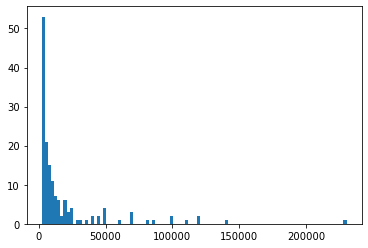

In [4]:
plt.hist(picher['연봉(2018)'], bins = 100)

<AxesSubplot:>

C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48393 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48393 missing from current font.
  font.set_text(s, 0, flags=flags)


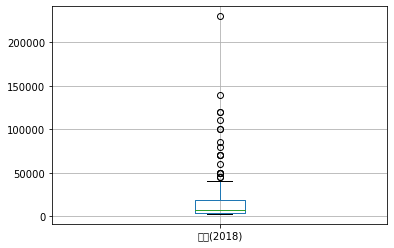

In [5]:
picher.boxplot(column = ['연봉(2018)'])

In [6]:
# 회귀분석
pi_fea_df = picher[['승','패','세','홀드','블론','경기','선발','이닝','삼진/9',
                    '볼넷/9','홈런/9','BABIP','LOB%','ERA','RA9-WAR','FIP','kFIP','WAR','연봉(2018)','연봉(2017)']]
pi_fea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   승         152 non-null    int64  
 1   패         152 non-null    int64  
 2   세         152 non-null    int64  
 3   홀드        152 non-null    int64  
 4   블론        152 non-null    int64  
 5   경기        152 non-null    int64  
 6   선발        152 non-null    int64  
 7   이닝        152 non-null    float64
 8   삼진/9      152 non-null    float64
 9   볼넷/9      152 non-null    float64
 10  홈런/9      152 non-null    float64
 11  BABIP     152 non-null    float64
 12  LOB%      152 non-null    float64
 13  ERA       152 non-null    float64
 14  RA9-WAR   152 non-null    float64
 15  FIP       152 non-null    float64
 16  kFIP      152 non-null    float64
 17  WAR       152 non-null    float64
 18  연봉(2018)  152 non-null    int64  
 19  연봉(2017)  152 non-null    int64  
dtypes: float64(11), int64(9)
memory 

C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49849 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54056 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54848 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48660 missing from current font.
  fon

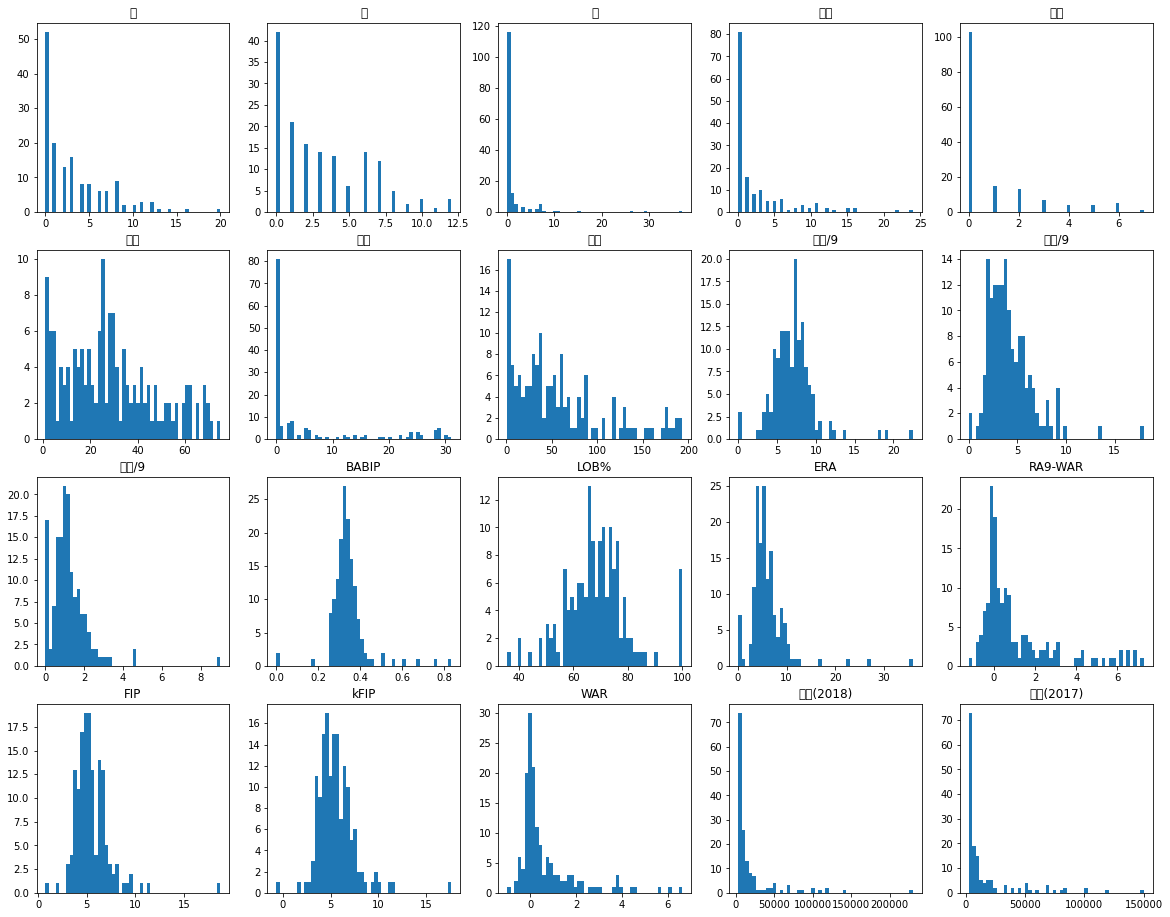

In [7]:
def plot_hist_each_column(df) :
    plt.rcParams['figure.figsize'] = [20,16]
    fig=plt.figure(1)
    for i in range(len(df.columns)) :
        ax = fig.add_subplot(4,5,i+1)
        plt.hist(df[df.columns[i]], bins = 50)
        ax.set_title(df.columns[i])
    plt.show()
plot_hist_each_column(pi_fea_df)

In [8]:
team_encoding = pd.get_dummies(picher['팀명'])
team_encoding.head()

,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0


In [9]:
picher = pd.concat([picher, team_encoding], axis=1)
picher.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,85000,0,0,0,0,1,0,0,0,0
1,소사,LG,11,11,1,0,0,30,29,185.1,...,50000,0,0,1,0,0,0,0,0,0
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,150000,1,0,0,0,0,0,0,0,0
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,100000,0,0,1,0,0,0,0,0,0
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,85000,0,0,0,0,0,0,1,0,0


In [10]:
picher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 31 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       152 non-null    object 
 1   팀명        152 non-null    object 
 2   승         152 non-null    int64  
 3   패         152 non-null    int64  
 4   세         152 non-null    int64  
 5   홀드        152 non-null    int64  
 6   블론        152 non-null    int64  
 7   경기        152 non-null    int64  
 8   선발        152 non-null    int64  
 9   이닝        152 non-null    float64
 10  삼진/9      152 non-null    float64
 11  볼넷/9      152 non-null    float64
 12  홈런/9      152 non-null    float64
 13  BABIP     152 non-null    float64
 14  LOB%      152 non-null    float64
 15  ERA       152 non-null    float64
 16  RA9-WAR   152 non-null    float64
 17  FIP       152 non-null    float64
 18  kFIP      152 non-null    float64
 19  WAR       152 non-null    float64
 20  연봉(2018)  152 non-null    int64 

In [11]:
x = picher.drop('연봉(2018)', axis=1)
y = picher['연봉(2018)']

In [12]:
y

0      140000
1      120000
2      230000
3      100000
4      111000
        ...  
147      7100
148      7500
149     10000
150      4000
151      4000
Name: 연봉(2018), Length: 152, dtype: int64

In [13]:
picher[picher.columns.difference(['선수명','y'])]

,BABIP,ERA,FIP,KIA,KT,LG,LOB%,NC,RA9-WAR,SK,...,세,승,연봉(2017),연봉(2018),이닝,팀명,패,한화,홀드,홈런/9
0,0.342,3.60,3.69,0,0,0,73.7,0,6.91,1,...,0,16,85000,140000,190.0,SK,7,0,0,0.76
1,0.319,3.88,3.52,0,0,1,67.1,0,6.80,0,...,1,11,50000,120000,185.1,LG,11,0,0,0.53
2,0.332,3.44,3.94,1,0,0,72.1,0,6.54,0,...,0,20,150000,230000,193.1,KIA,6,0,0,0.79
3,0.298,3.43,4.20,0,0,1,75.0,0,6.11,0,...,0,10,100000,100000,175.2,LG,7,0,0,1.02
4,0.323,3.80,4.36,0,0,0,74.1,0,6.13,0,...,0,13,85000,111000,187.1,롯데,7,0,0,0.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,0.355,7.76,6.21,0,0,0,56.9,0,-1.21,0,...,0,2,8100,7100,62.2,한화,5,1,0,1.58
148,0.263,5.92,6.41,1,0,0,65.4,0,0.39,0,...,0,3,3100,7500,59.1,KIA,2,0,0,1.06
149,0.382,11.66,8.03,0,0,0,52.8,0,-0.83,0,...,0,0,16000,10000,14.2,롯데,2,0,0,2.45
150,0.341,5.77,6.87,0,0,0,73.9,0,-0.40,0,...,0,0,2900,4000,43.2,삼성,3,0,1,1.44


In [14]:
x = x.iloc[:,1:]

In [91]:
x.astype(float)

ValueError: could not convert string to float: 'SK'

In [88]:
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split
# 독립변수의 정규화
x = pp.StandardScaler().fit(x),transform(x)
x_train, y_train, x_test, y_test = train_test_split(x, y, test_seize = 0.2, random_state=10)

ValueError: could not convert string to float: 'SK'